# Project: Investigate No-show appointments Dataset!

## Table of Contents
<ul>
<li><a href="#intro">Intro & questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a><ul>
    <li><a href='#q1'>Question 1</a></li>
    <li><a href='#q2'>Question 2</a></li>
    <li><a href='#q3'>Question 3</a></li>
    <li><a href='#q4'>Question 4</a></li>
    <li><a href='#q5'>Question 5</a></li>
    <li><a href='#q6'>Question 6</a></li>
    <li><a href='#q7'>Question 7</a></li>
    </ul></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.
>
Questions:
<ul id='returnq'>
    <li><a href='#q1'>Q1: Does gender determine if the patient will show up or not?</a></li>
    <li><a href='#q2'>Q2: Does age determine if the patient will show up or not?</a></li>
    <li><a href='#q3'>Q3: Does day of appointement determine if the patient will show up or not?</a></li>
    <li><a href='#q4'>Q4: if patient has Scholarship or not determine if the patient will show up or not?</a></li>
    <li><a href='#q5'>Q5: if patient have recived sms or not determine if the patient will show up or not?</a></li>
    <li><a href='#q6'>Q6: if we know evrey patient disease can we determine if the patient will show up or not?</a></li>
    <li><a href='#q7'>Q7: if we know evrey patient disease can we determine if the patient will show up or not?</a></li>
</ul>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning
#### data cleaning steps:<br>
1-drop PatientId irrelevent to our analysis.<br>
2-ScheduledDay & AppointmentDay to datetime: df[['ScheduledDay'],['AppointmentDay']].apply(pd.to_datetime)<br>
3-rename SMS_received to SmsReceived and No-show to NoShow<br>
4-Noshow to binary<br>
5-age outliers (0,-1,115)

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# 1-drop PatientId irrelevent to our analysis.
df.drop(columns=['PatientId'],inplace=True)
#check
df.head()


,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#2-ScheduledDay & AppointmentDay to datetime: 
df['ScheduledDay'] = df['ScheduledDay'].apply(pd.to_datetime)
df['AppointmentDay'] = df['AppointmentDay'].apply(pd.to_datetime)
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   AppointmentID   110527 non-null  int64              
 1   Gender          110527 non-null  object             
 2   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 3   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 4   Age             110527 non-null  int64              
 5   Neighbourhood   110527 non-null  object             
 6   Scholarship     110527 non-null  int64              
 7   Hipertension    110527 non-null  int64              
 8   Diabetes        110527 non-null  int64              
 9   Alcoholism      110527 non-null  int64              
 10  Handcap         110527 non-null  int64              
 11  SMS_received    110527 non-null  int64              
 12  No-show         110527 non-null  object             
dtypes: datetime64[

In [6]:
#3-rename SMS_received to SmsReceived and No-show to NoShow
df.rename(columns={'SMS_received':'SmsReceived','No-show':'NoShow'},inplace=True)
#check
df.columns

Index(['AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SmsReceived', 'NoShow'],
      dtype='object')

In [7]:
#4-Noshow to binary
#Be careful about the encoding of the last column:
#it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
print(df['NoShow'].value_counts())
df['NoShow'] = df['NoShow'].apply(lambda x:0 if x == 'Yes' else 1 )
#check
print(df['NoShow'].value_counts())

No     88208
Yes    22319
Name: NoShow, dtype: int64
1    88208
0    22319
Name: NoShow, dtype: int64


In [8]:
#5-age outliers (0,-1,115)
df = df.query('Age >= 1')
#check
df['Age'].describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   AppointmentID   106987 non-null  int64              
 1   Gender          106987 non-null  object             
 2   ScheduledDay    106987 non-null  datetime64[ns, UTC]
 3   AppointmentDay  106987 non-null  datetime64[ns, UTC]
 4   Age             106987 non-null  int64              
 5   Neighbourhood   106987 non-null  object             
 6   Scholarship     106987 non-null  int64              
 7   Hipertension    106987 non-null  int64              
 8   Diabetes        106987 non-null  int64              
 9   Alcoholism      106987 non-null  int64              
 10  Handcap         106987 non-null  int64              
 11  SmsReceived     106987 non-null  int64              
 12  NoShow          106987 non-null  int64              
dtypes: datetime64[

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.
<a id='q1'></a>
### Research Question 1 (Q1: Does gender determine if the patient will show up or not??)
<a href="#returnq">return to question</a>

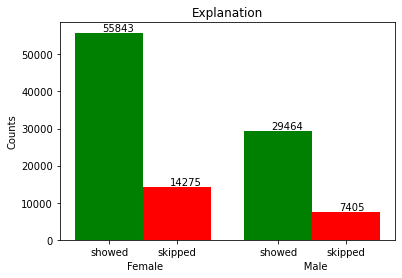

In [10]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

colors=['green','red','green','red']
data = df.groupby(['Gender']).NoShow.value_counts()
width=1
location = [0,1,2.5,3.5]
for i,d in enumerate(data):
    ax=plt.bar(location[i],d,width,label='Showed' if i%2 == 0 else 'Skipped',color=colors[i])
    plt.annotate(d,(location[i]-.1,d+500))
plt.title('Explanation')
plt.xlabel('Female{0}Male'.format(' '*45))
plt.ylabel('Counts')
plt.xticks(location, ['showed','skipped','showed','skipped'])
plt.show()
#conclusion twice number of appointments are made by females and about 20% of both gender do not show
#so gender has small factor

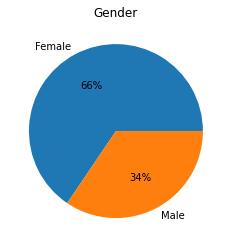

In [11]:
counts = df['Gender'].value_counts()
plt.pie(counts,labels=['Female','Male'],autopct='%1.0f%%')
plt.title('Gender')
plt.show()

<a id='q2'></a>
### Research Question 2  (Does age determine if the patient will show up or not?)
#### we have alot of ages so i will use 4 categories to filter them (children, teenagers, adults,seniors)
<a href="#returnq">return to question</a>

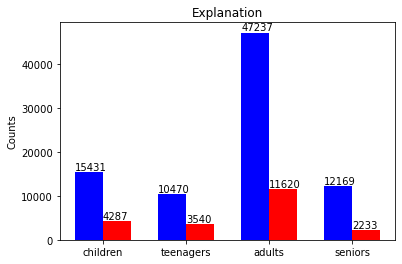

In [12]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_age = df[['Age','NoShow']].copy()
labels = ['children', 'teenagers', 'adults','seniors']
bins = [0,14,24,64,120]
df_age['Age'] = pd.cut(df_age['Age'], bins=bins, labels=labels)
age_data = df_age.groupby('Age').NoShow.value_counts()
width = 1
location = [0,1,3,4,6,7,9,10]
for i,d in enumerate(age_data):
    ax=plt.bar(location[i],d,width,label='Showed' if i%2 == 0 else 'Skipped',color='blue' if i%2==0 else 'red')
    plt.annotate(d,(location[i]-.5,d+500))
plt.title('Explanation')
plt.ylabel('Counts')
plt.xticks([.5,3.5,6.5,9.5],labels)
plt.show()
#conslusion adults seem to book the highst number of appointments with highst show and no show numbers
#seniors have the leasts no show number

<a id='q3'></a>
### Research Question 3  (Does day of appointement determine if the patient will show up or not?)
<a href="#returnq">return to question</a>

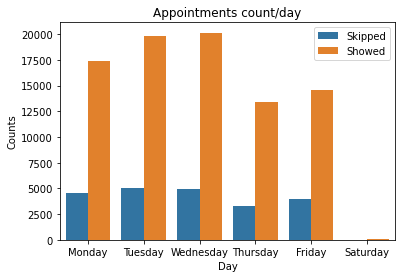

In [13]:

df_days = df[['AppointmentDay', 'NoShow']].copy()
df_days['day'] = df_days['AppointmentDay'].dt.dayofweek

days={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

ax  = plt.subplot()

sns.countplot(x='day', hue='NoShow', data=df_days)

ax.set_ylabel('Counts')
ax.set_xlabel('Day')
ax.set_xticklabels(days.values())
ax.set_title('Appointments count/day')
ax.legend(['Skipped', 'Showed'])
plt.show();

#conclusion Saturday has the least appointments
#they take sunday as day off
#all days seems to have the same skipped and show up ratio
#day doesnot affect if patient will show up or not

<a id='q4'></a>
### Research Question 4  (if patient has Scholarship or not determine if the patient will show up or not?)
<a href="#returnq">return to question</a>

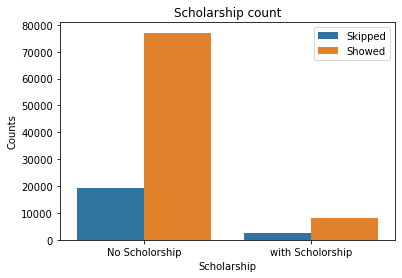

In [14]:
school_data = df[['Scholarship','NoShow']]
ax  = plt.subplot()
sns.countplot(x='Scholarship',hue='NoShow',data=school_data)
ax.set_ylabel('Counts')
ax.set_xticklabels(['No Scholorship','with Scholorship'])
ax.set_title('Scholarship count')
ax.legend(['Skipped', 'Showed'])
plt.show()
#Scholoship can not predict if patient will showup or not

<a id='q5'></a>
### Research Question 5  (if patient have recived sms or not determine if the patient will show up or not?)
<a href="#returnq">return to question</a>

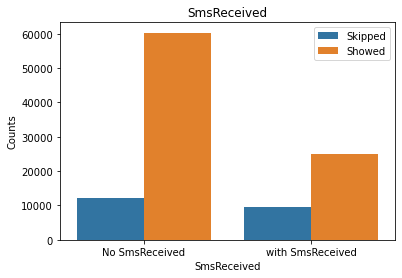

In [15]:
sms_data = df[['SmsReceived','NoShow']]
ax  = plt.subplot()
sns.countplot(x='SmsReceived',hue='NoShow',data=sms_data)
ax.set_ylabel('Counts')
ax.set_xticklabels(['No SmsReceived','with SmsReceived'])
ax.set_title('SmsReceived')
ax.legend(['Skipped', 'Showed'])
plt.show()
#SmsReceived can not predict if patient will showup or not 
#because patient with no sms recived has high show up ratio than others

<a id='q6'></a>
### Research Question 6  (if we know which Neighbourhood patient live in can we determine if the patient will show up or not?)
<a href="#returnq">return to question</a>

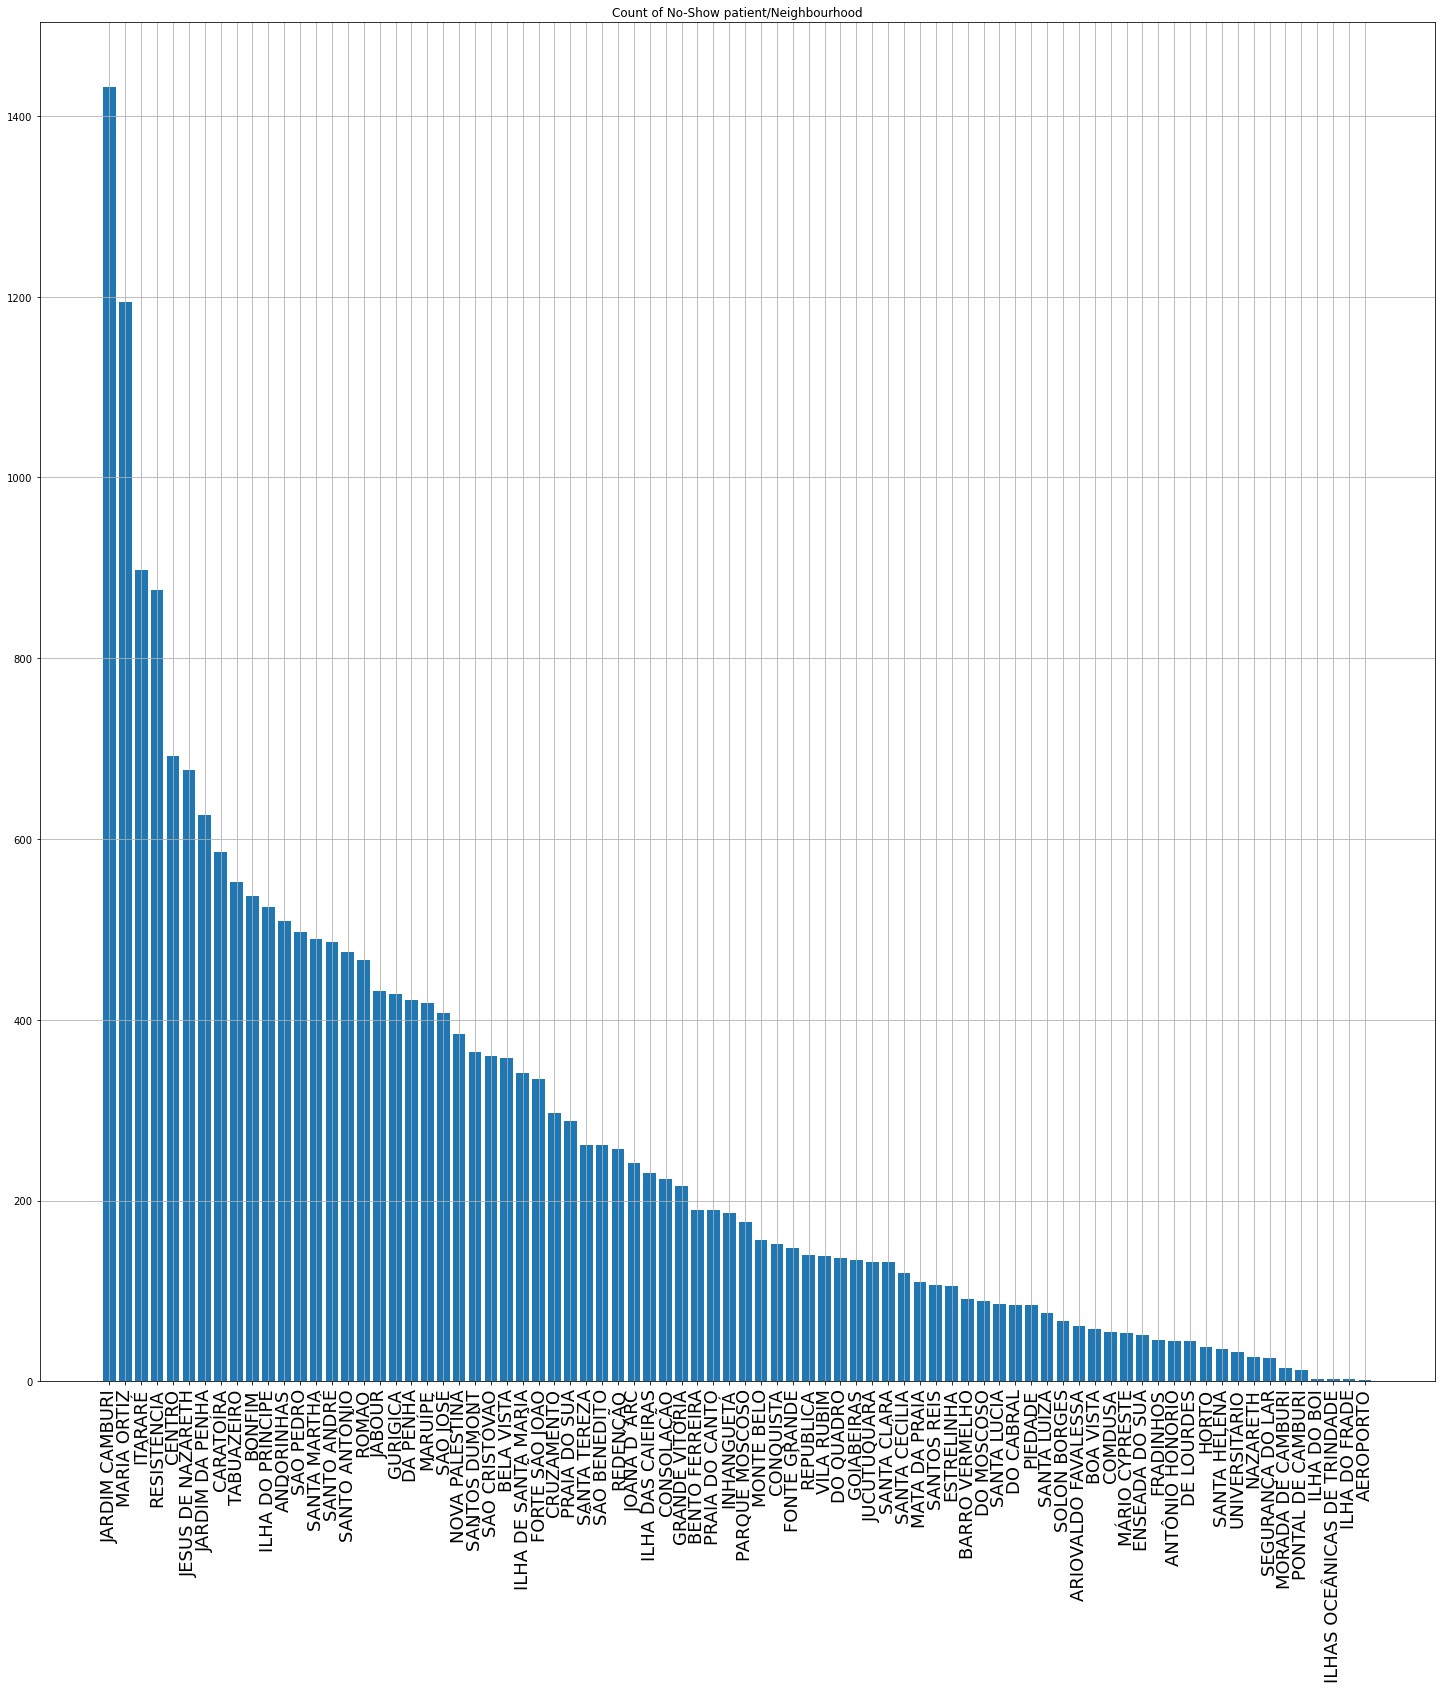

In [16]:
neighbourhood_counts = df[df['NoShow'] == 0].groupby('Neighbourhood').count()['Gender'].sort_values(ascending=False)
plt.figure(figsize=(25, 25))
plt.bar(neighbourhood_counts.index, neighbourhood_counts)
plt.xticks(rotation=90, fontsize=18)
plt.title('Count of No-Show patient/Neighbourhood')
plt.grid();
#patient form jardim camburi and maria ortiz neighbourhoods have the most no showup 
#please notice using pie chart is messy if we can group them we might have a better understanding

<a id='q7'></a>
### Research Question 7  (if we know evrey patient disease can we determine if the patient will show up or not?)
<a href="#returnq">return to question</a>

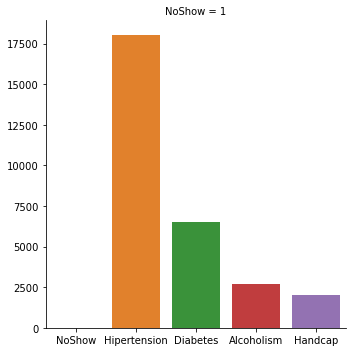

In [17]:
disease_data = df.query('NoShow == 1')[['NoShow','Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']]
disease = disease_data.groupby(['NoShow']).sum()
disease.reset_index(inplace=True)
ax = sns.catplot(data=disease,col='NoShow',kind='bar')
plt.show();
#this mean that patient with Hipertension are more to not show up for appointement
#after Hipertension patients diabtes patients are the scond to not show up

<a id='conclusions'></a>
## Conclusions

### 1- Females book 66% of appointments and 20% of both gender do not showup.

### 2- Adults seems to book the most appointments with high no showup,
###     but seniors shows the least no showup.

### 3- Days od week is nutral the does not present any proportional diffrence,
###     but we do not have enough data about Saturdays or they represent the least appointment booking count.

### 4- Patients with scholorships or not does not seem to determine if the patient will show up or not.

### 5- Sms Received can not predict if patient will showup or not,
###     because patient with no sms recived has high show up ratio than others.

### 6- Patient form jardim camburi and maria ortiz neighbourhoods have the most no showup,
###    please notice using pie chart is messy if we can group them we might have a better understanding.

### 7- Patients with Hipertension are more to not show up for appointement,
###   after Hipertension patients comes diabtes patients are the scond to not show up.
